# Machine Learning Assignment # 02 | Faizan Ikram - 2018-UET-NML-27

# 1 - Linear Network


Data:            x         y  color
0  1.079023  1.857706    0.0
1  0.505740  1.856651    0.0
2  4.247522  3.206346    1.0
3  1.214683  2.189020    0.0
4  0.456740 -0.558157    1.0
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 4)                 12        
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
125/125 [==============================] - 0s 949us/step - loss: 0.5822 - accuracy: 0.6940


AttributeError: 'History' object has no attribute 'predict'

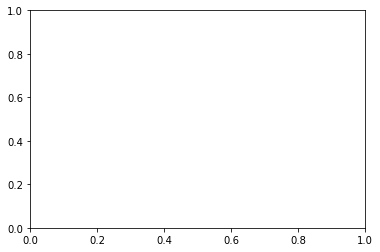

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

print('\nData: ', train_df.head())


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(4, activation='relu', name='First_layer')(inputs)
outputs = keras.layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

y = train_df.color.values
X = np.column_stack((train_df.x.values, train_df.y.values))


clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()